# Genetic Algorithms

This jupyter notebook applies genetic algorithm to the Makespan Problem. Genetic Algorithms are search methods based on selection and genetics. We define "chromosomes" as candidate solutions. The Makespan problem deals with the time a job takes from the beginning to the end. Given 1,...,n jobs with processing time p1,...,pn and m machines, the task is to assign jobs to machines in a way that minimizes time to finish all jobs.

Cited literature comes from Sastry, Goldberg and Kendall's "Genetic Algorithms".

## 1. Initialization

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from datetime import datetime

In the initialization we first set up a list that illustrates the total number of machines. Starting from machine 0 until a given integer.

In [2]:
def define_machines(machine_number):
    machines = []

    for i in range(machine_number):
        machines.append(i) 
    return machines   


In our example each job may take a while. The "process time" is random but has to be within an interval that is defined via a lower and an upper bound. Here these bounds are called borders. The output is an array that displays the time each job takes. That means positions 0 stands for job 0 and the integer that is taken at this position signifies the process time that is assigned to this job.

In [3]:
def creating_process_times(stack1_border_high,stack1_border_low,stack1_number,stack2_border_high,
                           stack2_border_low,stack2_number):
    
    stack1 = np.random.randint(stack1_border_low,stack1_border_high+1, size=stack1_number)
    stack2 = np.random.randint(stack2_border_low,stack2_border_high+1, size=stack2_number)

    process_times = np.concatenate((stack1 ,stack2), axis=0)
    
    return process_times



The initialization function randomly assigns jobs to machines. It takes the number of total machines (machine_number), the number of total jobs (job_number) and the population size. The population size is the most important factor when it comes to scalability and performance of our algorithm. A small population sizes might have the consequence that it will converge too quickly and delivers "substandard solutions". A large population size, on the other hand, may lead to "unnecessary expenditure of valuable computational time". The output is a list of arrays that displays all candidate solutions. 

In [4]:
def initialize(machine_number,job_number,population_size):
    # Assigning random jobs to machines
    population = []
    chromosone = []
    #job_locations = np.random.randint(0,machine_number,size = job_number)
    
    for i in range(population_size):
        chromosone = np.random.randint(0,machine_number,size = job_number)
        population.append(chromosone)
        job_locations = []
        
    return population



The evaluate_chromosomes function takes the process_time that each job takes, the chromosomes and the machines as input and evaluates how "fit" each chromosome is, i.e. how long it takes to get all the jobs done. In order to find out how long a chromosome takes, we have to add all processing times for each job that belong to one machine. The machine with the longest processing time defines the fitness of a chromosome. 

In [5]:
# calculate processing time
def evaluate_chromosones(process_times,chromosone,machines):
    time = 0
    max_time = 0
    for i in range(machines):
       
        for j in range(len(chromosone)):
            if chromosone[j] == i:
                time = time + process_times[j]
                
        if time > max_time:
            max_time = time
    
        time = 0               
                
    chromosome_fitness_level= -max_time      
    return chromosome_fitness_level
#print(evaluate_chromosones([ 5, 5, 5, 7, 7, 6, 5],[0, 1, 1, 1, 2, 1, 0],3))

## 2. Evaluation

The Initialization has finished and the evaluate function calculates and array called population_fitness that displays the fitness level of each chromosome. Note that the order of the fitness values is important since it marks to which chromosome it belongs to. 

In [6]:

# take the function "compute time" and get fitness level for each chromosome, give back array of fitness values
def evaluate(population,process_times,machines):
    population_fitness = []
    for i in (population):
        population_fitness.append(evaluate_chromosones(process_times, i,machines))
    return population_fitness


# evaluate_chromosones(process_times, chromosone,machines):
# creating_process_times(stack1_border_high,stack1_border_low,stack1_number,stack2_border_high,stack2_border_low,stack2_number):
# initialize(machine_number,job_number,population_size):
evaluate(initialize(2,5,5), creating_process_times(4,1,5,8,5,5),2)

[-11, -8, -8, -9, -11]

## 3. Selection

Now the survival-of-the-fittest mechanism comes into play and is applied to the candidate solutions. We chose two different selection processes. On the one hand, roulette wheel selection and on the other hand, tournament selection. 

In roulette wheel selection, the method receives the population, the fitness of the population as an array (order important) and the mating pool size. It first calculates the probability of each candidate according to its fitness value. Metaphorically speaking, we are designing a huge roulette wheel with spot sizes illustrating the probability of each candidate. Good solutions (i.e. smaller fitness values) have smaller slots (biased). Note that we are looking for the smallest fitness value since we want to minimize the processing time in our optimization problem. After calculating the cumulative propability (boundaries), a uniform random number called rand_mate $\in $ (0,1) is selected. If rand_mate < boundaries, then select the first chromosome. Consider also the case that rand_mate might be 1 and the mating pool is the same as the population.

In [7]:
def roulette_select(population,population_fitness,mating_pool_size):
    # TODO: take the variable "mating pool" and get this number of chromosomes from the population (Roulette, Tournament)
    # returns array of chromosomes (mating pool)
    
    denominator = np.sum(population_fitness)*-1
   
    for i in range(len(population_fitness)):
       
        population_fitness[i]=population_fitness[i] + denominator
        
    denominator = np.sum(population_fitness)
    probabilities = np.true_divide(population_fitness, denominator)
    
    boundaries = []
    boundaries.append(0)
    boundaries[0] = probabilities[0]
    for i in range(1,len(probabilities)):
        boundaries.append(0)
        boundaries[i] = probabilities[i]+boundaries[i-1]
    mating_pool = []
   
    for i in range(mating_pool_size):
        rand_mate = np.random.uniform(0,1)
        #print(rand_mate)
        for j in range(len(boundaries)):
            if boundaries[j] > rand_mate:
                mating_pool.append(population[j])
                break
            if rand_mate == 1:
                mating_pool.append(population[0])
                break
    #select the chromosome according to algorithm like rhoulette wheel selection and return the matin_pool as chromosomes
    
    return mating_pool

population = [[1, 0, 1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 1, 1, 1, 0], [1, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]]
population_fitness = [-23, -25, -17, -27, -40, -30, -11, -23, -30, -23]


roulette_select(population,population_fitness,5)

[[1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
 [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]]

The second selection method is called tournament selection. It also takes the population, its fitness array and the mating pool size as input. It basically takes the chromosomes that have the lowest fitness values. Note that we have an optimization problem where we want to minimize the total processing time. 

In [8]:
def tournament_select(population,population_fitness,mating_pool_size):
    # TODO: take the variable "mating pool" and get this number of chromosomes from the population (Roulette, Tournament)
    # returns array of chromosomes (mating pool)

    mating_pool=[]
    highest_fitness_level= 0
    old_highest_fitnesslevel_location=[]
    b=0
    for i in range(0,mating_pool_size):
        for j in range(0,len(population_fitness)):
            if population_fitness[j]>highest_fitness_level and j not in old_highest_fitnesslevel_location:
                highest_fitness_level=population_fitness[j]
             
                b=j
        mating_pool.append(population[b])
        
        old_highest_fitnesslevel_location.append(b)
        
        highest_fitness_level=0
                     
                       
                       

    
    
    return mating_pool 
   # return mydict



population = [[1, 0, 1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 1, 1, 1, 0], [1, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]]
population_fitness = [50,52, 40, 39, 32, 30, 20, 23, 25, 24]

tournament_select(population,population_fitness,5)
#print(population_fitness)

# Issues:
#  problem is that saving the old best fitness level locations in an array and checking for that does not work yet.
# and also in the append of the mating pool it's' still appending the
# fitnesslevel of las position of the j loop when we actually want to append population[j]

[[0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 1, 1, 1, 1, 0]]

## 4. Recombination

In recombination, two chromosomes are taken, called parent1 and parent2, and they are recombined (have children, here: child1 and child2) that might produce better outputs, i.e. lower fitness values. Note that we are looking for the lowest fitness value since we want to minimize the processing time. 

We used two different methods of recombination. On the one hand, one-point-crossover and on the other hand, uniform-crossover. In one-point crossover the parents are recombined in such way that child1 receives the values of parent1 for everything less or equal than a randomly set location, and the values of parent2 for all entries greater than the location. Conversely this holds for child2.

In [9]:
def one_point_crossover(parent1,parent2):
    location = np.random.randint(0,len(parent1))
    child1 = np.copy(parent1)
    child2 = np.copy(parent2)
    for i in range(len(parent1)):
        if i <= location:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
            
    return child1,child2  

Uniform-crossover randomly initializes a location_array that consists of 0 and 1's (same length as the parent arrays). Child1 receives the values of parent1 if the value in the location array is 0. It receives the values of parent2 if the value in the location array is 1. Conversely this holds for child2.  

In [10]:
def uniform_crossover(parent1, parent2):
    location_array = np.random.choice(2, len(parent1))
    child1 = np.copy(parent1)
    child2 = np.copy(parent2)
    for i in range(len(parent1)):
        if location_array[i] == 0:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
            
    return child1,child2

In [11]:
def recombine_one_point_crossover(mating_pool,crossover_probability):
    # takes randomly two chromosomes and performs one point crossover / two point
     # crossover probability that two "parents" fuck, if not they just get copied
    # returns children array, same size like mating pool 
    
    children_chromosome = []
    i = 0
    while len(mating_pool) > 0:
        parent1 = mating_pool.pop()
        parent2 = mating_pool.pop()
        
        if random.random() < crossover_probability:
            child1, child2 = one_point_crossover(parent1,parent2)
            children_chromosome.append(child1)
            children_chromosome.append(child2)
        else:
            children_chromosome.append(parent1)
            children_chromosome.append(parent2)
        i += 1
    
    return children_chromosome

In [12]:
def recombine_uniform_crossover(mating_pool,crossover_probability):
    # takes randomly two chromosomes and performs one point crossover / two point
     # crossover probability that two "parents" fuck, if not they just get copied
    # returns children array, same size like mating pool 
    
    children_chromosome = []
    i = 0
    while len(mating_pool) > 0:
        parent1 = mating_pool.pop()
        parent2 = mating_pool.pop()
        
        if random.random() < crossover_probability:
            child1, child2 = uniform_crossover(parent1,parent2)
            children_chromosome.append(child1)
            children_chromosome.append(child2)
        else:
            children_chromosome.append(parent1)
            children_chromosome.append(parent2)
        i += 1
    
    return children_chromosome

## 5. Mutation

Mutation (in contrast to recombination) operates locally and tries to improve the fitness level with local optimization techniques. Here we consider the flip method and the swap method. 

In [13]:
def flip(child_chromosome,mutation_probability,machine_number):
    mutated_child_chromosome = np.copy(child_chromosome)
    if random.random() < mutation_probability:
        location = np.random.randint(0,len(child_chromosome))
        new_machine_number = np.random.randint(0,machine_number+1)
        mutated_child_chromosome[location] = new_machine_number 
    return mutated_child_chromosome
print(flip([0,1,2,3,0],0.5,4))

[2 1 2 3 0]


In [14]:
def swap(child_chromosome,mutation_probability):
    mutated_child_chromosome = np.copy(child_chromosome)
    if random.random() < mutation_probability:
        location1 = np.random.randint(0,len(child_chromosome))
        location2 = np.random.randint(0,len(child_chromosome))
        while location1 == location2:
                location2 = np.random.randint(0,len(child_chromosome))
        help_variable = mutated_child_chromosome[location1]
        mutated_child_chromosome[location1] = mutated_child_chromosome[location2]
        mutated_child_chromosome[location2] = help_variable
    return mutated_child_chromosome
print(swap([0,1,2,3,0],0.5))

[1 0 2 3 0]


In [15]:
def mutate_flip(child_chromosomes,mutation_probability,machine_number):
    # goes through children_chromosome, get changed with mutation probability, ramdom machine_flip / swap
    # gives back children array
    mutated_child_chromosomes = np.copy(child_chromosomes)
    for i in range(len(child_chromosomes)):
        child_chromosomes[i] = flip(child_chromosomes[i],mutation_probability,machine_number)
    return mutated_child_chromosomes

In [16]:
def mutate_swap(child_chromosomes,mutation_probability,machine_number):
    # goes through children_chromosome, get changed with mutation probability, ramdom machine_flip / swap
    # gives back children array
    mutated_child_chromosomes = np.copy(child_chromosomes)
    for i in range(len(child_chromosomes)):
        child_chromosomes[i] = swap(child_chromosomes[i],mutation_probability)
    return mutated_child_chromosomes

## 6. Replacement

In [17]:
def replace_deleteall(chromosomes,children_chromosomes,process_times,machine_number):
    # gets population & children array, gives back new population
    # delete_all - look at the difference in size between population and children, take the best ones of population to get rid difference, then delete rest and put children in
    # choose_best - look at population and children at same time, choose the best ones of all to get new population
    if len(chromosomes) == len(children_chromosomes):
        new_chromosomes = np.copy(children_chromosomes)
    else:
        new_chromosomes = []
        difference = len(chromosomes)-len(children_chromosomes)
        
        while (len(new_chromosomes) < difference):
            chromosomes_values = evaluate(chromosomes,process_times,machine_number)
            max_value = max(chromosomes_values)
            max_index = chromosomes_values.index(max_value)
            new_chromosomes.append(chromosomes[max_index])
            chromosomes.delete[max_index]
            
        new_chromosomes.extend(children_chromosomes)
    
    return new_chromosomes


def replace_choosebest(chromosomes, children_chromosomes,process_times,machine_number):
    
    new_chromosomes = []
    all_chromosomes =[]
    all_chromosomes.extend(chromosomes)
    all_chromosomes.extend(children_chromosomes)
    
    while (len(new_chromosomes) < len(chromosomes)):
            chromosomes_values = evaluate(all_chromosomes,process_times,machine_number)
            max_value = max(chromosomes_values)
            max_index = chromosomes_values.index(max_value)
            new_chromosomes.append(all_chromosomes[max_index])
            del all_chromosomes[max_index]
    
    return new_chromosomes

## 7. Action

In [56]:
population_size = 10
machine_number = 20
job_number = 300
stack1_border_high = 10000
stack1_border_low = 10
stack1_number = 200
stack2_border_high = 1000
stack2_border_low = 100
stack2_number = 100
# Initialization
chromosomes = []
chromosomes = initialize(machine_number,job_number,population_size)
process_times = creating_process_times(stack1_border_high,stack1_border_low,stack1_number,stack2_border_high,stack2_border_low,stack2_number)
copy_population=chromosomes


In [57]:
do_recombine_one_point_crossover = False
do_mutate_flip = False
do_replace_deleteall = False
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

False False False False


In [29]:
do_recombine_one_point_crossover = True
do_mutate_flip = False
do_replace_deleteall = False
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

True False False False


In [ ]:
do_recombine_one_point_crossover = False
do_mutate_flip = FTrue
do_replace_deleteall = False
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [37]:
do_recombine_one_point_crossover = False
do_mutate_flip = False
do_replace_deleteall = True
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

False False True False


In [40]:
do_recombine_one_point_crossover = False
do_mutate_flip = False
do_replace_deleteall = False
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

False False False True


In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = True
do_replace_deleteall = False
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = False
do_replace_deleteall = True
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = False
do_replace_deleteall = False
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = False
do_mutate_flip = True
do_replace_deleteall = True
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = False
do_mutate_flip = True
do_replace_deleteall = False
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = False
do_mutate_flip = False
do_replace_deleteall = True
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = True
do_replace_deleteall = True
do_roulette_select = False
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [26]:
do_recombine_one_point_crossover = True
do_mutate_flip = True
do_replace_deleteall = False
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

True True False True


In [ ]:
do_recombine_one_point_crossover = False
do_mutate_flip = True
do_replace_deleteall = True
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = False
do_replace_deleteall = True
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

In [ ]:
do_recombine_one_point_crossover = True
do_mutate_flip = True
do_replace_deleteall = True
do_roulette_select = True
print(do_recombine_one_point_crossover, do_mutate_flip, do_replace_deleteall, do_roulette_select)

evaluation
[-100854, -83900, -94594, -80636, -87188, -81989, -96305, -77504, -91643, -79217]
Selection
Recombination
Replacement
evaluation
[-77504, -79217, -80636, -81989, -83900, -87188, -91643, -94594, -96305, -100854]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -79217, -80636, -81989]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504]
Selection
Recombination
Replacement
evaluation
[-77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504, -77504]
Selection


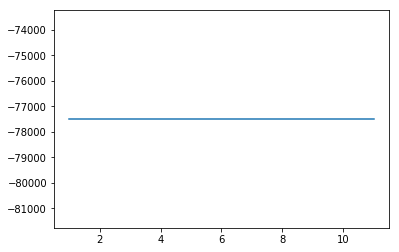

Done!
[[12 13  2 ... 18  7 14]
 [12 13  2 ... 18  7 14]
 [12 13  2 ... 18  7 14]
 ...
 [12 13  2 ... 18  7 14]
 [12 13  2 ... 18  7 14]
 [12 13  2 ... 18  7 14]]


In [58]:
#variables
# population_size = 100
# machine_number = 20
# job_number = 300
# stack1_border_high = 10000
# stack1_border_low = 10
# stack1_number = 200
# stack2_border_high = 1000
# stack2_border_low = 100
# stack2_number = 100


mating_pool_size = 6
crossover_probability = 0.9
mutation_probability = 0.01

# do_recombine_one_point_crossover = False
# do_mutate_flip = False
# do_replace_deleteall = False
# do_roulette_select = True

converged = False
count = 0


y_coord_fitness = []
x_coord_count = []
y_coord=0
x_coord=0
#start loop
while not converged:
    children_chromosomes = []
    new_chromosomes = []
    
    # Evaluation
    population_fitness = evaluate(chromosomes,process_times,machine_number)
    print("evaluation")
    #print(chromosomes)
    #print(process_times)
    print(population_fitness)
    # Selection
    if do_roulette_select:
        selected_mating_pool = roulette_select(chromosomes,population_fitness,mating_pool_size)
    else:
        selected_mating_pool = tournament_select(chromosomes,population_fitness,mating_pool_size)
    print("Selection")
    #print(selected_mating_pool)
    # Recombination
    if do_recombine_one_point_crossover:
        children_chromosomes = recombine_one_point_crossover(selected_mating_pool,crossover_probability)
    else:
        children_chromosomes = recombine_uniform_crossover(selected_mating_pool,crossover_probability)
    print("Recombination")
    # Mutation
    if do_mutate_flip:
        children_chromosomes = mutate_flip(children_chromosomes,mutation_probability,machine_number)
    else:
        children_chromosomes = mutate_swap(children_chromosomes,mutation_probability,machine_number)
    #print("Mutation")
    # Replacement
    if do_replace_deleteall:
        new_chromosomes = replace_deleteall(chromosomes,children_chromosomes,process_times,machine_number)
    else:
        new_chromosomes = replace_choosebest(chromosomes,children_chromosomes,process_times,machine_number)

    chromosomes = np.copy(new_chromosomes)
    print("Replacement")
    

    
    if count == 10:
        if (abs(fitness_value_first - np.amax(evaluate(chromosomes,process_times,machine_number)))) <= 1:
            converged = True
        else:
            count = 0
            fitness_value_first = 0
    elif count == 0:
        fitness_value_first = np.amax(evaluate(chromosomes,process_times,machine_number))
        count += 1
    else:
        count += 1
    
    best_chromosone = tournament_select(chromosomes,population_fitness,1)
    y_coord = evaluate(best_chromosone,process_times,machine_number)
    x_coord = x_coord + 1
    y_coord_fitness.append(y_coord)
    x_coord_count.append(x_coord)
    
plt.plot(x_coord_count,   # here go the X coordinates
         y_coord_fitness,   # here go the Y coordinates
#          marker='x', # as I'm plotting only one point here, I'd like to make it extra visible
         markersize=10 # by choosing a nice marker shape ('x') and large size
         )
plt.show() # this shows the current plot in a pop-up window
        

print('Done!')
selected_mating_pool = tournament_select(chromosomes,population_fitness,1)
print(chromosomes)
chromosomes=copy_population

